In [1]:
%pylab inline

from scipy.fft import fft, ifft

def mysavefig(filename):
    plt.tight_layout()
    plt.savefig("../images/chap5/"+filename, bbox_inches="tight", dpi=200)
    return

Populating the interactive namespace from numpy and matplotlib


In [16]:
###########
# RLC SÉRIE
###########

#############################
# PARAMÈTRES DE LA RÉSOLUTION
#############################
t0 = -5e-3               # bornes de l'intervalle de résolution
tf = 5e-3
dt = 1e-7                # pas de temps
n  = int((tf-t0)/dt + 1) # nombre de points
t = np.linspace(t0,tf,n) # temps en seconde

###########################
# PARAMÈTRES DU CIRCUIT RLC
###########################
R = 50 # en ohms Rc = 200
L = 1e-3 # en henry
C = 1e-7 # en farads
omega0 = 1 / np.sqrt(L * C) # pulsation propre en s^-1
Q = L * omega0 / R   # facteur de qualité

############
# SIGNAL GBF
############
E   = 1   # offset
amp = 1   # amplitude
f   = 200   # fréquence en hertz

constant = np.ones(n) * E
step     = np.array([(E if val>=0 else 0) for val in t]) 
square   = amp * np.sign(np.sin(2*np.pi*f*t)) + E
sinus    = amp * np.sin(2*np.pi*f*t) + E
noise    = np.random.normal(0,.05,n) # modélisation d'un bruit aléatoire

e = step # signal aux bornes du GBF

#################
# MÉTHODE D'EULER
#################
u0  = 0   # CI en volts
i0  = 0   # CI en ampères
u = np.zeros(len(t))  # préparation du tableau
i = np.zeros(len(t))
u[0] = u0             # initialisation en fonction de la CI
i[0] = i0
for k in range(n-1):  # méthode d'Euler explicite
    i[k+1] = i[k] + dt / L * (e[k] - R * i[k] - u[k])
    u[k+1] = u[k] + dt * i[k] / C

##########################
# REPRÉSENTATION GRAPHIQUE
##########################
#plt.figure(figsize=(4,3))
plt.plot(t*1e3,e, label="e(t)")
plt.plot(t*1e3,u, label="u(t)")
#plt.plot(t*1e3,100*i, label="i(t)")
plt.xlabel("Temps (ms)")
plt.ylabel("Tension (V)")
plt.legend()
#plt.xlim(-.5,.5)
#print("Q = {:.2f}".format(Q))

#mysavefig("experience_lc.png")

In [13]:
C = 1e-7
L = 1e-6
R = .001

omega0 = 1 / np.sqrt(L*C)
Q = np.sqrt(L/C)/R

print(Q)

mu = omega0 / 2 / Q
Omega = omega0 * np.sqrt(1 - 1/4/Q**2)
print(mu, Omega/2/np.pi)

E = 5

phi = np.arctan(-mu/Omega)
a = -E / np.cos(phi)

t = np.linspace(0,.00001,100000)
u = a * np.exp(-mu * t) * (  np.cos(Omega*t + phi) ) + E
i = - C * a * np.exp(-mu * t) * (np.cos(Omega*t + phi) + np.sin(Omega*t + phi))

Pj = R * i**2
Pc = u * i
Pg = E * i
Pl = Pg - Pc - Pj

plt.plot(t,Pg)
plt.plot(t,Pj)
plt.plot(t,Pc)
plt.plot(t,Pl)

3162.2776601683795
500.0 503292.11475371884


# Random noisy signal with FFT

/Users/remimetzdorff/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/remimetzdorff/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/remimetzdorff/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


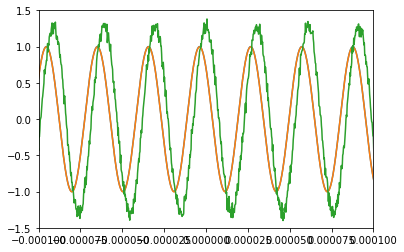

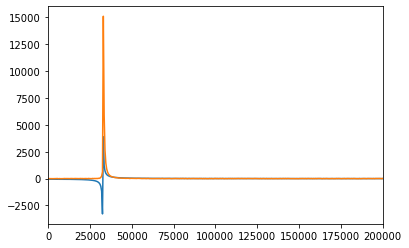

In [117]:
def make_fft(x,y,modulus=True):
    N = len(x)
    T = x[1]-x[0]
    yf = fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    if modulus:
        return xf, 2.0/N * np.abs(yf[0:N//2])
    else:
        return xf, 2*yf[0:N//2]

def make_ifft(xf,yf, symetrical=True):
    n = len(xf)
    x = list(xf)
    y = list(yf)
    for i in range(n):
        x.append(-xf[-1-i])
        y.append(y[-1-i])
    ys = ifft(y)
    xmax = 1/xf[1]
    if symetrical:
        xs = np.linspace(-xmax/2,xmax/2,2*n)
    return xs, ys

def lorentz(x, x0, gamma, scale):
    maxim  = 2 / np.pi / gamma
    factor = scale * 2 / np.pi / gamma
    denom  = 1 + ((x-x0)/(gamma/2))**2
    return factor / maxim / denom

N = 2**13
t = np.linspace(-1000e-6, 1000e-6, N)

phi = np.pi/4
f0  = 2**15
s   = np.cos(2*np.pi*f0*t+phi) 

x, y = make_fft(t,s, modulus=False)
tf, sf = make_ifft(x,y)

ft = x
yt = lorentz(x, 2**15, 1e3, N) * np.exp(np.angle(y)) + 10 * np.exp(1j * np.random.normal(0,np.pi,len(y)))
td, sd = make_ifft(ft, yt)

plt.figure()
plt.plot(t,s)
plt.plot(tf, sf)
plt.plot(td, np.real(sd))
plt.xlim(-100e-6, 100e-6)
plt.ylim(-1.5,1.5)

plt.figure()
plt.plot(x,y)
plt.xlim(0,2e5)
plt.plot(ft, yt)

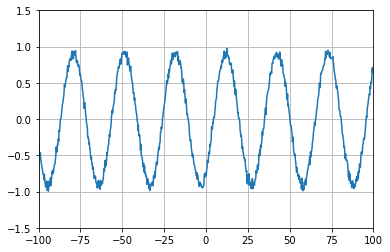

In [118]:
plt.figure(figsize=(6,4))
plt.plot((td+12e-6)*1e6, np.real(sd)/np.sqrt(2))
plt.xlim(-100, 100)
plt.ylim(-1.5,1.5)
plt.grid(True)

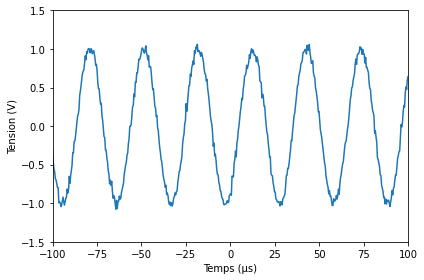

In [136]:
f   = 2**15
phi = -3.2*np.pi/10

t = np.linspace(-100e-6, 100e-6, 2**9)
s = np.sin(2*np.pi*f*t + phi) + np.random.normal(0,.04,len(t))

plt.figure(figsize=(6,4))
plt.plot(t*1e6, s)
plt.xlim(-100, 100)
plt.ylim(-1.5,1.5)

plt.xlabel("Temps (µs)")
plt.ylabel("Tension (V)")

mysavefig("signal_diapason.png")

(2.306328020072213, 0.47)

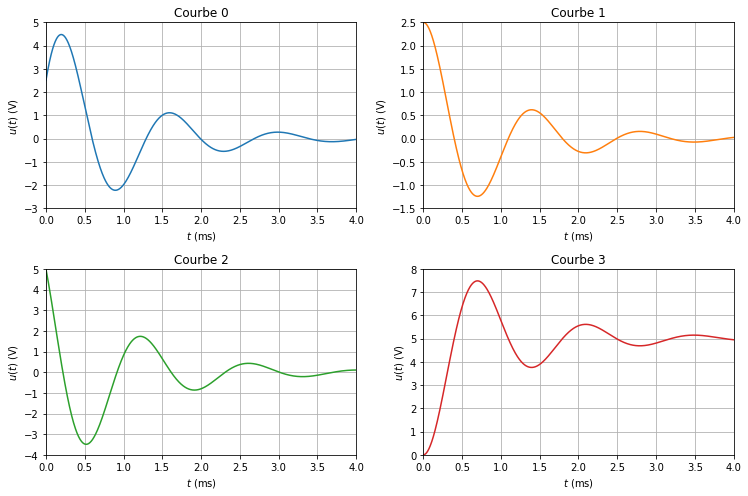

In [81]:
# TD5 exo3

from scipy.integrate import odeint

E = 5
R = 10e3
C = 100e-9
L = 470e-3
omega0 = 1/np.sqrt(L*C)
Q = R / 2 * np.sqrt(C / L)

def rlc(X, t):
    u = X[0]
    v = X[1]
    du = v
    dv = - omega0 ** 2 * u - omega0/Q * du
    return [du,dv]
def rlc_E(X, t):
    u = X[0]
    v = X[1]
    du = v
    dv = - omega0 ** 2 * u - omega0/Q * du + omega0**2 * E
    return [du,dv]

scale = 1.75
plt.figure(figsize=(scale*6,scale*4))
sps = (2,2)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (0,1))
ax3 = plt.subplot2grid(sps, (1,0))
ax4 = plt.subplot2grid(sps, (1,1))

for i, ax in enumerate([ax1, ax2, ax3, ax4]):
    ax.set_xlabel("$t$ (ms)")
    ax.set_ylabel("$u(t)$ (V)")
    ax.set_xlim(0,4)
    ax.grid(True)
    ax.set_title("Courbe {:.0f}".format(i))

t = np.linspace(0,4e-3, 1000)

X = odeint(rlc,[E/2,4000*E],t)
u = X[:,0]
ax1.plot(t*1e3,u,"C0")
ax1.set_ylim(-3,5)

X = odeint(rlc,[E/2,0],t)
u = X[:,0]
ax2.plot(t*1e3,u,"C1")
ax2.set_ylim(-1.5,E/2)

mu = omega0/2/Q
Omega = omega0 * np.sqrt(1-1/4/Q**2)

def u_ana(t):
    fact_exp = np.exp(-mu*t)
    A = E/2
    B = mu*E/2/Omega
    return fact_exp * (A * np.cos(Omega*t) + B * np.sin(Omega * t))
#ax2.plot(t*1e3, u_ana(t))

X = odeint(rlc,[E,-4000*E],t)
u = X[:,0]
ax3.plot(t*1e3,u,"C2")
ax3.set_ylim(-4,E)

X = odeint(rlc_E,[0,0],t)
u = X[:,0]
ax4.plot(t*1e3,u,"C3")
ax4.set_ylim(0,8)

mysavefig("td5_exo3.png")
Q, L

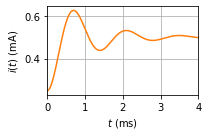

In [83]:
plt.figure(figsize=(3,2))

t = np.linspace(0,4e-3,100000)

def deriv(x,t):
    return np.diff(x) / np.diff(t), t
def integ(x,t):
    dt = t[1] - t[0]
    int_x = [0]
    int_t = [t[0]]
    for val in x:
        int_x.append(int_x[-1]+val*dt)
        int_t.append(int_t[-1]+dt)    
    return np.array(int_x), np.array(int_t)

X = odeint(rlc,[E/2,0],t)
u = X[:,0]
ic,_ = deriv(u,t)
ic   = C*ic 
ir   = u/R
il,_ = integ(u,t)
il   = il/L

i = ic + ir[:-1] + il[:-2]
plt.plot(t[:-1]*1e3,i*1e3,"C1")
#plt.ylim(-1.5,E/2)
plt.xlabel("$t$ (ms)")
plt.ylabel("$i(t)$ (mA)")
plt.xlim(0,4)
plt.grid(True)
mysavefig("td5_exo3_corr.png")

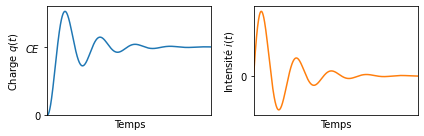

In [79]:
# TD5 exo4

omega0 = 1
gamma = .2
omega = np.sqrt(omega0**2 - gamma**2)

def q_ana(t):
    return np.exp(-gamma*t) * (-np.cos(omega*t) - gamma/omega * np.sin(omega*t)) + 1

def i_ana(t):
    return np.exp(-gamma*t) * omega0**2 / omega * np.sin(omega*t)

plt.figure(figsize=(6,2))
sps = (1,2)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (0,1))

t = np.linspace(0,30,1000)

ax1.plot(t, q_ana(t))
ax1.set_yticks([0,1,2])
ax1.set_yticklabels(["0","$CE$", ""])
ax1.set_ylim(0,1.6)
ax1.set_ylabel("Charge $q(t)$")

ax2.plot(t, i_ana(t),"C1")
ax2.set_yticks([0])
ax2.set_ylabel("Intensité $i(t)$")

for ax in [ax1, ax2]:
    ax.set_xlim(0,30)
    ax.set_xlabel("Temps")
    ax.set_xticks([])

    mysavefig("td5_exo4_corr.png")

5.0

# Oscillateur harmonique : Euler vs odeint

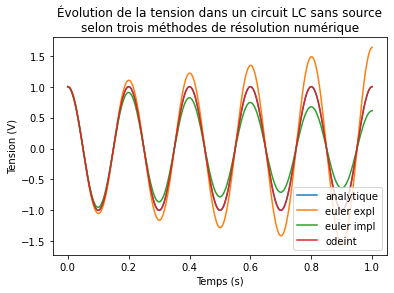

In [257]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#############################
# PARAMÈTRES DE LA RÉSOLUTION
#############################
t0 = 0                   # bornes de l'intervalle de résolution
tf = 1
dt = 1e-3                # pas de temps en secondes
n  = int((tf-t0)/dt + 1) # nombre de points
t = np.linspace(t0,tf,n) # temps en seconde

##########################
# PARAMÈTRES DU CIRCUIT LC
##########################
omega0 = 2*np.pi*5 # pulsation propre en s^-1
u0  = 1            # CI : tension aux bornes du condensateur
du0 = 0            #      dérivée première de la tension aux bornes du condensateur
V0  = [u0,du0]

###############################################
# FONCTION ASSOCIÉE À L'ÉQUATION DIFFÉRENTIELLE
###############################################
def oh(V, t):
    x, y = V        # vecteur V : v[0] = u, v[1] = du/dt
    dx = y
    dy = - omega0**2 * x
    dV = [dx, dy]   # vecteur dV/dt : dV[0] = du/dt, dV[1] = d2u/dt2 
    return dV 

############
# RÉSOLUTION
############
# Euler explicite (cf TD4)
def euler_explicite(t):
    x = np.zeros(len(t))
    y = np.zeros(len(t))
    x[0] = V0[0]
    y[0] = V0[1]
    for i in range(len(t)-1):
        dx, dy = oh([x[i], y[i]], t)
        x[i+1] = x[i] + dt * dx
        y[i+1] = y[i] + dt * dy
    return x, y

# Euler explicite directe
def euler_explicite_d(t):
    x = np.zeros(len(t))
    x[0] = V0[0]
    x[1] = x[0] + V0[1]*dt
    for k in range(len(t)-2):
        x[k+2] = 2 * x[k+1] - (1 + omega0**2 * dt**2) * x[k]
    return x

# Euler implicite (Hors programme)
def euler_implicite(t):
    x = np.zeros(len(t))
    y = np.zeros(len(t))
    x[0] = V0[0]
    y[0] = V0[1]
    for i in range(len(t)-1):
        x[i+1] = (x[i] + dt * y[i]) / (1 + omega0**2 * dt**2)
        y[i+1] = (y[i] - omega0**2 * dt * x[i]) / (1 + omega0**2 * dt**2)
    return x, y

##########################
# REPRÉSENTATION GRAPHIQUE
##########################
# Analytique
plt.plot(t, np.cos(omega0*t), label="analytique")

# Euler explicite
u, du = euler_explicite(t)
plt.plot(t, u, label="euler expl")

# Euler explicite directe
u = euler_explicite_d(t)
#plt.plot(t, u, label="euler expl_directe")

# Euler implicite
u, du = euler_implicite(t)
plt.plot(t, u, label="euler impl")

# odeint de scipy.integrate
X = odeint(oh, X0, t)
u = X[:,0]
plt.plot(t, u, label="odeint")

plt.title("Évolution de la tension dans un circuit LC sans source\
\nselon trois méthodes de résolution numérique")
plt.xlabel("Temps (s)")
plt.ylabel("Tension (V)")
plt.legend()

Text(0, 0.5, 'Tension (V)')

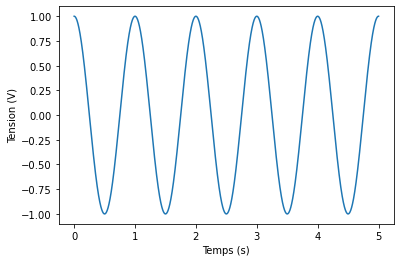

In [263]:
"""td5_mwe_odeint.py"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#############################
# PARAMÈTRES DE LA RÉSOLUTION
#############################
t0 = 0                   # bornes de l'intervalle de résolution
tf = 5                   # en secondes
dt = 1e-3                # pas de temps en secondes
n  = int((tf-t0)/dt + 1) # nombre de points
t = np.linspace(t0,tf,n) # temps en secondes
X0 = [1,0]               # conditions initiales : [u(0), du(0)/dt]
omega0 = 2 * np.pi * 1   # pulsation propre en s^-1

###############################################
# FONCTION ASSOCIÉE À L'ÉQUATION DIFFÉRENTIELLE
###############################################
def F(V, t):
    x, y = V        # vecteur V : v[0] = u, v[1] = du/dt
    dx = y          # dx/dt
    dy = -omega0 ** 2 * x # dy/dt
    dV = [dx, dy]   # vecteur dV/dt : dV[0] = du/dt, dV[1] = d2u/dt2 
    return dV

########################################
# RÉSOLUTION ET REPRÉSENTATION GRAPHIQUE
########################################
X = odeint(F, X0, t) # résolution
u = X[:,0]           # récupération des données
plt.plot(t, u)
plt.xlabel("Temps (s)")
plt.ylabel("Tension (V)")

Text(0, 0.5, 'Tension (V)')

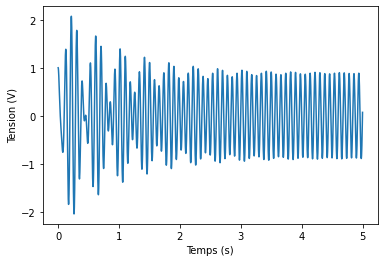

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#############################
# PARAMÈTRES DE LA RÉSOLUTION
#############################
t0 = 0                   # bornes de l'intervalle de résolution
tf = 5                   # en secondes
dt = 1e-3                # pas de temps en secondes
n  = int((tf-t0)/dt + 1) # nombre de points
t = np.linspace(t0,tf,n) # temps en secondes

###########################
# PARAMÈTRES DU CIRCUIT RLC
###########################
X0 = [1,0]               # conditions initiales : [u(0), du(0)/dt]
omega0 = 2 * np.pi * 10  # pulsation propre en s^-1
Q = 30

E = .5                   # amplitude de l'excitation
omega = 1.25 * omega0    # pulsation de l'excitation

###############################################
# FONCTION ASSOCIÉE À L'ÉQUATION DIFFÉRENTIELLE
###############################################
def F(V, t):
    x, y = V        # vecteur V : v[0] = u, v[1] = du/dt
    dx = y          # dx/dt
    dy = -omega0 ** 2 * x - omega0/Q * dx + omega0**2 * E * np.sin(omega*t) # dy/dt
    dV = [dx, dy]   # vecteur dV/dt : dV[0] = du/dt, dV[1] = d2u/dt2 
    return dV

########################################
# RÉSOLUTION ET REPRÉSENTATION GRAPHIQUE
########################################
X = odeint(F, X0, t) # résolution
u = X[:,0]           # récupération des données
plt.plot(t, u)
plt.xlabel("Temps (s)")
plt.ylabel("Tension (V)")

Text(0, 0.5, 'Tension (V)')

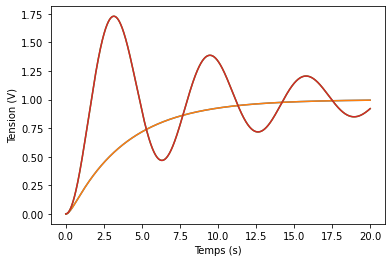

In [17]:
# Application 7

#############################
# PARAMÈTRES DE LA RÉSOLUTION
#############################
t0 = 0                   # bornes de l'intervalle de résolution
tf = 20                   # en secondes
dt = 1e-3                # pas de temps en secondes
n  = int((tf-t0)/dt + 1) # nombre de points
t = np.linspace(t0,tf,n) # temps en secondes

omega0 = 1
E = 1

# Cas Q = 1/4
Q = 1/4

r1 = -omega0/2/Q + omega0/2/Q * np.sqrt(1-4*Q**2)
r2 = -omega0/2/Q - omega0/2/Q * np.sqrt(1-4*Q**2)

def sol1(t):
    return E * (1 - r1 * np.exp(r2 * t) / (r1-r2) +  r2 * np.exp(r1 * t) / (r1-r2))

def F(V, t):
    x, y = V        # vecteur V : v[0] = u, v[1] = du/dt
    dx = y          # dx/dt
    dy = -omega0 ** 2 * x - omega0/Q * dx + omega0**2 * E # dy/dt
    dV = [dx, dy]   # vecteur dV/dt : dV[0] = du/dt, dV[1] = d2u/dt2 
    return dV

X0 = [0,0]               # conditions initiales : [u(0), du(0)/dt]
X = odeint(F, X0, t) # résolution
u = X[:,0]           # récupération des données
plt.plot(t, u)
plt.plot(t, sol1(t))

# Cas Q = 5
Q = 5

mu    = omega0 / 2 / Q
Omega = omega0 / 2 / Q * np.sqrt(4*Q**2 - 1)

def sol2(t):
    return E * (- np.cos(Omega * t) - mu/Omega * np.sin(Omega*t)) * np.exp(-mu * t) + E

X0 = [0,0]               # conditions initiales : [u(0), du(0)/dt]
X = odeint(F, X0, t) # résolution
u = X[:,0]           # récupération des données
plt.plot(t, u)
plt.plot(t, sol2(t))

plt.xlabel("Temps (s)")
plt.ylabel("Tension (V)")